In [64]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [65]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'


In [66]:
import os
import pandas as pd



sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

# Concatenate all session means DataFrames into a single DataFrame
all_session_means = pd.concat(session_means.values(), ignore_index=True)

# Add a column to indicate the session
all_session_means['session'] = all_session_means.index.map(lambda x: session_names[x // len(session_means['session1'])])

# Display the combined DataFrame
print(all_session_means)



   subject  mean_SCR_Amp    session
0    sub-6      0.008757   session1
1    sub-1      0.010503   session1
2    sub-8      0.000095   session1
3    sub-9      0.000107   session1
4    sub-7      0.000211   session1
5   sub-10      0.000105   session1
6   sub-11      0.000117   session1
7    sub-2      0.001018   session1
8    sub-4      0.000104   session1
9    sub-3      0.002554   session1
10   sub-6      0.000090   session2
11   sub-1      0.003853   session2
12   sub-8      0.000082   session2
13   sub-9      0.000936   session2
14   sub-7      0.000066   session2
15  sub-10      0.000095   session2
16  sub-11      0.000104   session2
17   sub-2      0.000082   session2
18   sub-4      0.000626   session2
19   sub-3      0.002505   session2
20   sub-6      0.000094   session3
21   sub-1      0.004949   session3
22   sub-9      0.000094   session3
23  sub-10      0.000085   session3
24  sub-11      0.000088   session3
25   sub-2      0.000093   session3
26   sub-4      0.000419   s

        session1  session2  session3  session4  session5a  session5b
sub-1   0.010503  0.003853  0.004949  0.003526   0.008382   0.006278
sub-2   0.001018  0.000082  0.000093  0.001711   0.000096   0.000094
sub-3   0.002554  0.002505  0.004169  0.003497   0.003077   0.003029
sub-4   0.000104  0.000626  0.000419  0.000108   0.000069   0.000131
sub-6   0.008757  0.000090  0.000094  0.001128   0.002512   0.003878
sub-7   0.000211  0.000066       NaN       NaN   0.000468   0.000868
sub-8   0.000095  0.000082       NaN  0.000084   0.001939   0.000771
sub-9   0.000107  0.000936  0.000094  0.004215   0.000095   0.000098
sub-10  0.000105  0.000095  0.000085  0.000101   0.006052   0.004220
sub-11  0.000117  0.000104  0.000088  0.000520   0.000067   0.000059


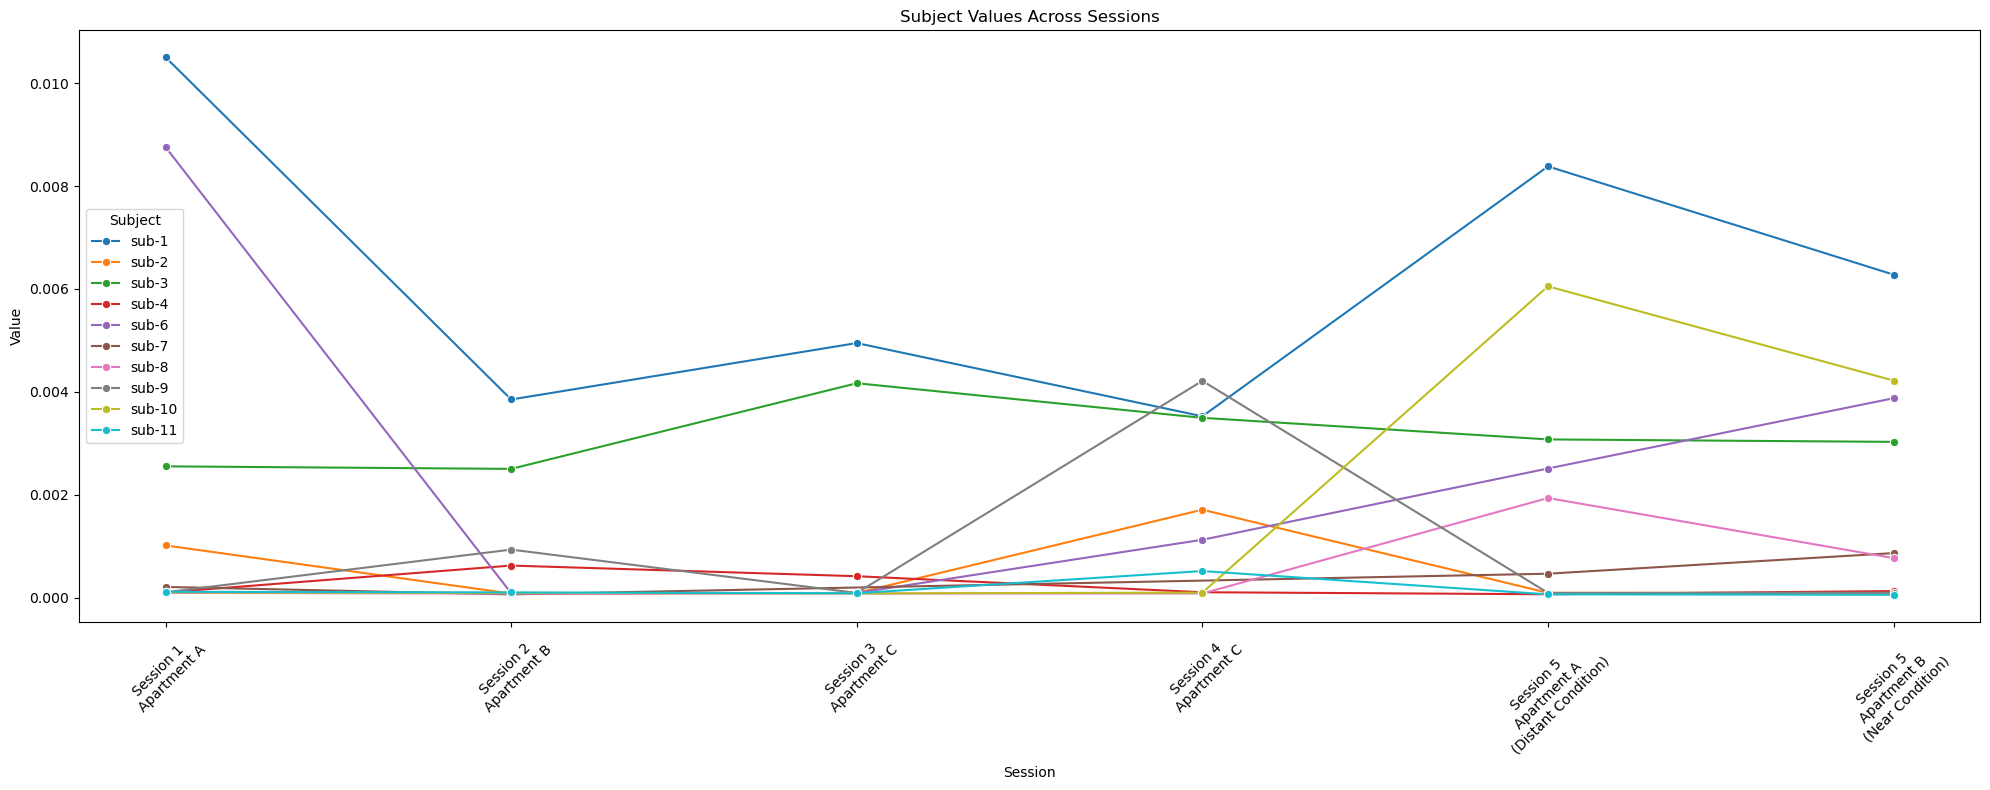

In [67]:
# To plot mean SCR Amplitude for all subjects across all sessions

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_mean_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_means.items():
    for subject, mean in value_for_all_subjects:
        if subject not in sessions_mean_new:
            sessions_mean_new[subject] = []
        sessions_mean_new[subject].append([session, mean])

#Assigning session and it's corresponding data to each Subject
df_data = {}
for subject, session_data in sessions_mean_new.items():
    df_data[subject] = {session: value for session, value in session_data}

    
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


# Reset index to have 'Subject' as a column for plotting purposes
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subject'}, inplace=True)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars=['Subject'], var_name='Session', value_name='Value')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='Session', y='Value', hue='Subject', marker='o')

# Custom labels for the x-axis
labels = [
    'Session 1 \n Apartment A', 
    'Session 2\n Apartment B', 
    'Session 3\n Apartment C', 
    'Session 4\n Apartment C', 
    'Session 5\n Apartment A \n (Distant Condition)',
    'Session 5\n Apartment B \n (Near Condition)'
]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Labels and title
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Subject Values Across Sessions')
plt.tight_layout()
#plt.show()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean SCR Amplitude.png", dpi=300, bbox_inches='tight')  


            session1  session2      session3      session4  session5a  \
sub-1   4.627879e-04  0.000200 -7.675100e-05 -3.412732e-04  -0.001674   
sub-2  -2.186813e-05 -0.000001  9.219836e-07 -1.646853e-04   0.000006   
sub-3   3.818104e-04 -0.000111 -6.282515e-05  1.485633e-04  -0.000108   
sub-4  -2.833117e-06 -0.000192 -9.635436e-05  4.994302e-06   0.000004   
sub-6  -1.038668e-03 -0.000002  9.180727e-06 -6.006516e-06   0.000077   
sub-7  -9.242432e-06  0.000003           NaN           NaN  -0.000026   
sub-8  -1.982011e-06  0.000004           NaN  8.385998e-06   0.000142   
sub-9  -2.521339e-06 -0.000688  9.432961e-07  1.352796e-03   0.000003   
sub-10 -8.382225e-07 -0.000001  3.117861e-06 -3.053354e-06   0.000443   
sub-11  2.112139e-05 -0.000002  7.573019e-05 -3.644225e-07   0.000007   

        session5b  
sub-1    0.001213  
sub-2    0.000006  
sub-3   -0.000132  
sub-4   -0.000008  
sub-6    0.000010  
sub-7   -0.000037  
sub-8   -0.000095  
sub-9   -0.000003  
sub-10   0.00000

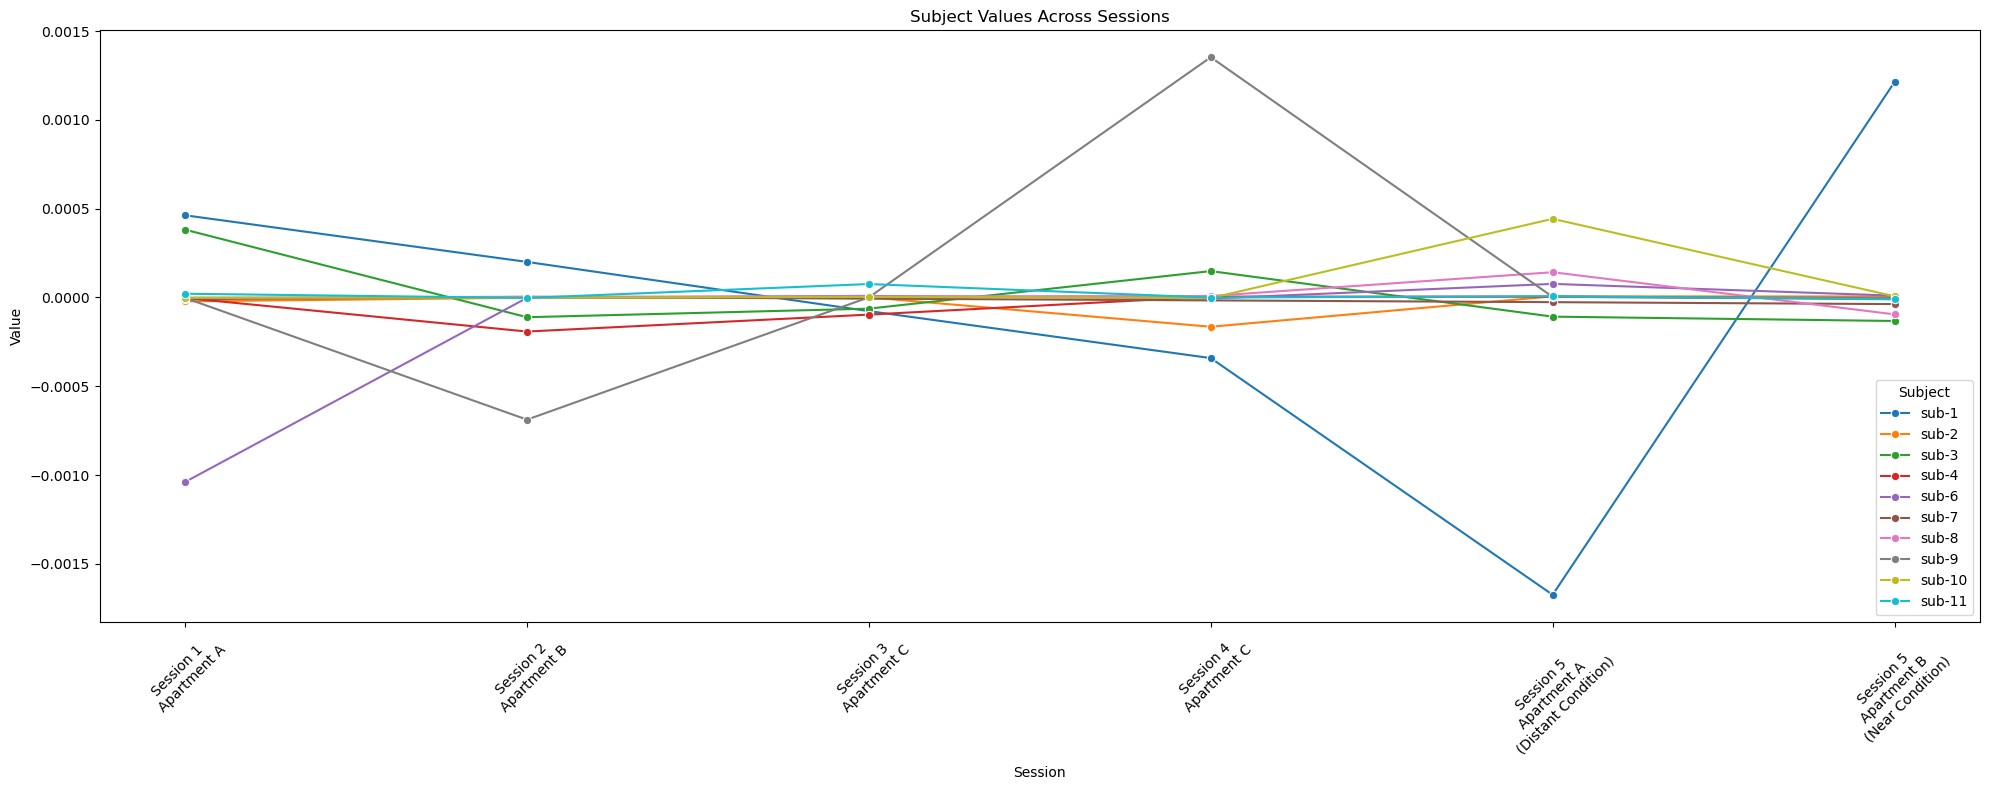

In [68]:
# Mean Tonic EDA for second half of the session

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']
save_figs == 0
for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Assuming the data has a column for timestamps or row numbers
                # Consider data points from the second half of the session
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]

                mean_SCR_Amp = df_session_second_half['EDA_Phasic'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_mean_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_means.items():
    for subject, mean in value_for_all_subjects:
        if subject not in sessions_mean_new:
            sessions_mean_new[subject] = []
        sessions_mean_new[subject].append([session, mean])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_mean_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


# Reset index to have 'Subject' as a column for plotting purposes
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subject'}, inplace=True)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars=['Subject'], var_name='Session', value_name='Value')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='Session', y='Value', hue='Subject', marker='o')

# Custom labels for the x-axis
labels = [
    'Session 1 \n Apartment A', 
    'Session 2\n Apartment B', 
    'Session 3\n Apartment C', 
    'Session 4\n Apartment C', 
    'Session 5\n Apartment A \n (Distant Condition)',
    'Session 5\n Apartment B \n (Near Condition)'
]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Labels and title
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Subject Values Across Sessions')
plt.tight_layout()
plt.show()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_EDA_Tonic_Across_Half_Sessions.png", dpi=300, bbox_inches='tight')

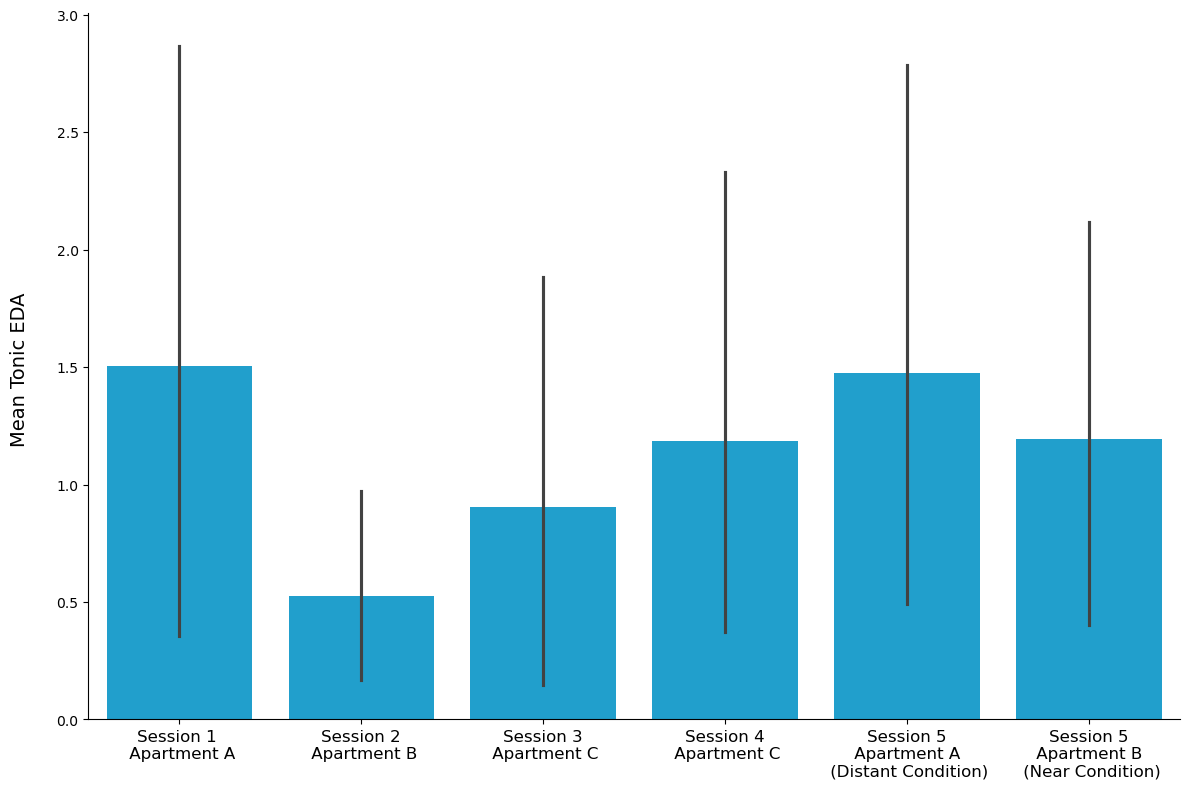

In [77]:
# Bar Plot of Mean Tonic EDA for second half of the session

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                
                mean_tonic_eda = df_session_second_half['EDA_Tonic'].mean()
                session_means[session_name].append([sub_dir, mean_tonic_eda])

    session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_tonic_eda'])

    # Plot each subject's mean tonic EDA for each session
# Sinai color code: light blue = #05ace8, dark blue = #1e226c, magenta = #c53088

all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name  # Add a session column
    all_sessions.append(df)

df_all_sessions = pd.concat(all_sessions, ignore_index=True)

subject_order = [f'sub-{i}' for i in range(1, 11)] 
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)
df_all_sessions = df_all_sessions.sort_values(by=['subject', 'session'])


all_sessions = []
for session_name, df in session_means.items():
    df['session'] = session_name
    all_sessions.append(df)
df_all_sessions = pd.concat(all_sessions, ignore_index=True)

plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', color = '#05ace8')
plt.xlabel(None)
plt.xticks(ticks=plt.xticks()[0], labels=labels, fontsize=12)
plt.ylabel('Mean Tonic EDA \n', fontsize = 14)
plt.tight_layout()
sns.despine()


if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)
    


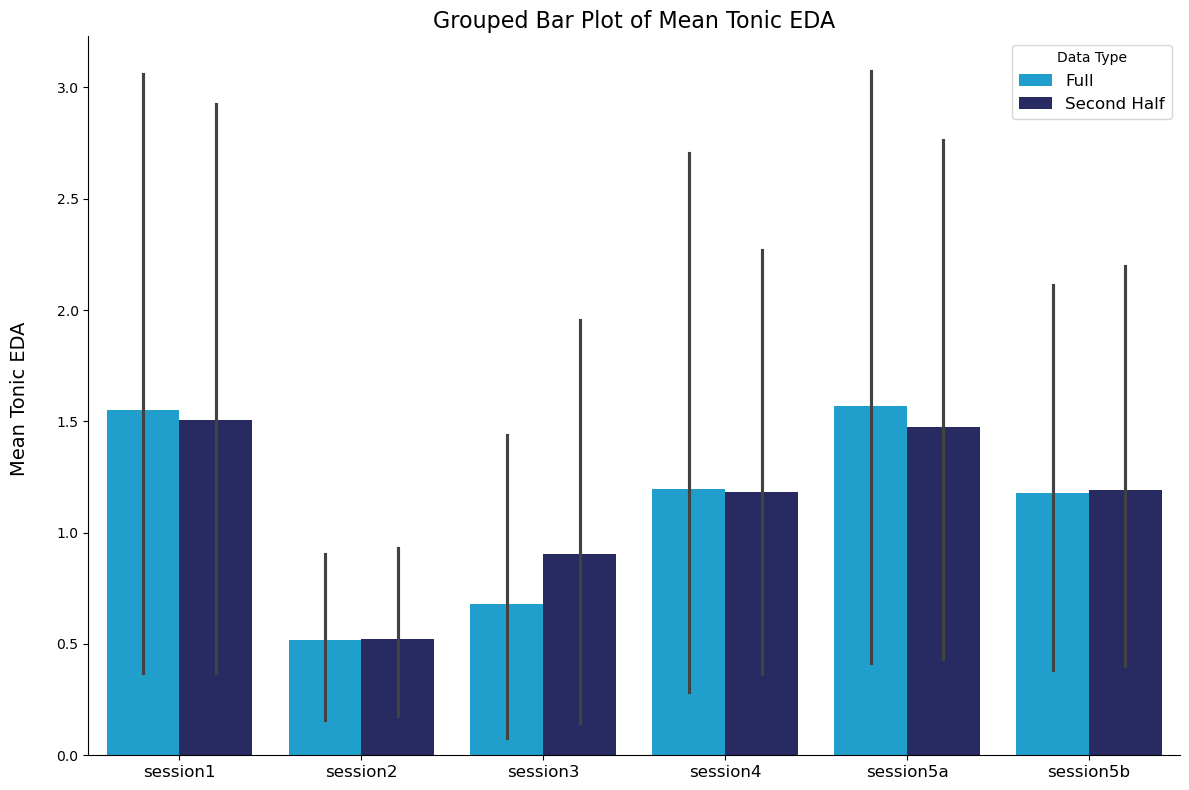

In [123]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means_full = []
session_means_second_half = []

for session_file, session_name in zip(sessions, session_names):
    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean for the full data
                mean_full = df_session['EDA_Tonic'].mean()
                session_means_full.append([sub_dir, session_name, mean_full])

                # Calculate mean for the second half
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                mean_tonic_eda = df_session_second_half['EDA_Tonic'].mean()
                session_means_second_half.append([sub_dir, session_name, mean_tonic_eda])

# Create DataFrames for full and second half means
df_full_means = pd.DataFrame(session_means_full, columns=['subject', 'session', 'mean_tonic_eda'])
df_second_half_means = pd.DataFrame(session_means_second_half, columns=['subject', 'session', 'mean_tonic_eda'])

# Add a new column to distinguish between full and second half means
df_full_means['data_type'] = 'Full'
df_second_half_means['data_type'] = 'Second Half'

# Concatenate the DataFrames
df_all_sessions = pd.concat([df_full_means, df_second_half_means], ignore_index=True)

# Now you can proceed with your plotting code

# Order subjects for plotting
subject_order = [f'sub-{i}' for i in range(1, 11)]
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)

# Fill NaN values (if any)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', hue='data_type', palette=["#05ace8", "#1e226c"])
plt.xlabel(None)
plt.ylabel('Mean Tonic EDA \n', fontsize=14)
plt.title('Grouped Bar Plot of Mean Tonic EDA', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.tight_layout()
sns.despine()

# Save figure if specified
save_figs = 1  # Adjust as necessary
if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

plt.show()


In [70]:
# To plot sum of SCR Peaks for all subjects across all sessions

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_sums = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Peaks'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_sum_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_sums.items():
    for subject, sum in value_for_all_subjects:
        if subject not in sessions_sum_new:
            sessions_sum_new[subject] = []
        sessions_sum_new[subject].append([session, sum])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_sum_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


        session1  session2  session3  session4  session5a  session5b
sub-1       56.0      34.0      54.0      35.0       54.0       43.0
sub-2       73.0     208.0     171.0      46.0      127.0      111.0
sub-3       58.0      71.0      59.0      67.0       59.0       56.0
sub-4      192.0      35.0      32.0     201.0       92.0      176.0
sub-6       61.0     184.0     192.0       9.0       36.0       53.0
sub-7       47.0      91.0       NaN       NaN       52.0       66.0
sub-8      142.0     171.0       NaN     116.0       44.0       25.0
sub-9      198.0      17.0     179.0      45.0      155.0      160.0
sub-10     159.0     189.0     133.0     188.0       51.0       53.0
sub-11      50.0     109.0       9.0       9.0       29.0       51.0


In [71]:
#  Sum of SCR Onsets for all subjects across all sessions

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_sums = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Onsets'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_sum_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_sums.items():
    for subject, sum in value_for_all_subjects:
        if subject not in sessions_sum_new:
            sessions_sum_new[subject] = []
        sessions_sum_new[subject].append([session, sum])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_sum_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)

        session1  session2  session3  session4  session5a  session5b
sub-1       56.0      34.0      54.0      35.0       54.0       43.0
sub-2       73.0     208.0     171.0      46.0      127.0      111.0
sub-3       58.0      70.0      59.0      66.0       59.0       56.0
sub-4      192.0      35.0      32.0     201.0       92.0      176.0
sub-6       61.0     184.0     192.0       9.0       36.0       53.0
sub-7       47.0      91.0       NaN       NaN       52.0       66.0
sub-8      142.0     170.0       NaN     116.0       44.0       25.0
sub-9      197.0      17.0     179.0      45.0      155.0      160.0
sub-10     159.0     189.0     133.0     187.0       51.0       53.0
sub-11      50.0     109.0       9.0       9.0       29.0       51.0


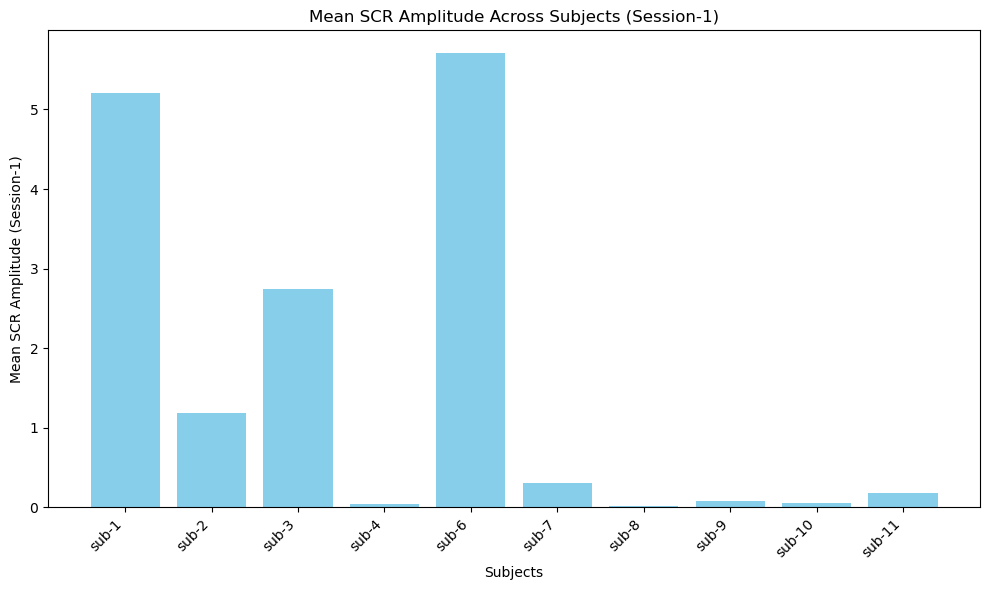

In [72]:
# To plot mean SCR Amplitude for all subjects across session 1 

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

# Initialize dictionary to store session-1 mean SCR Amplitude for each subject
session_1_means = {}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[0])  # Access only session-1.csv
        if os.path.exists(session_1_path):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['EDA_Tonic'].mean()
                session_1_means[sub_dir] = mean_SCR_Amp
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")

# Create a pandas Series from the dictionary for plotting
subjects = list(session_1_means.keys())
mean_values = list(session_1_means.values())
df_data = pd.Series(mean_values, index=subjects)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_data.index, df_data.values, color='skyblue')

# Set labels and title
plt.xlabel('Subjects')
plt.ylabel('Mean SCR Amplitude (Session-1)')
plt.title('Mean SCR Amplitude Across Subjects (Session-1)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Session_1.png", dpi=300, bbox_inches='tight')
else:
    plt.show()


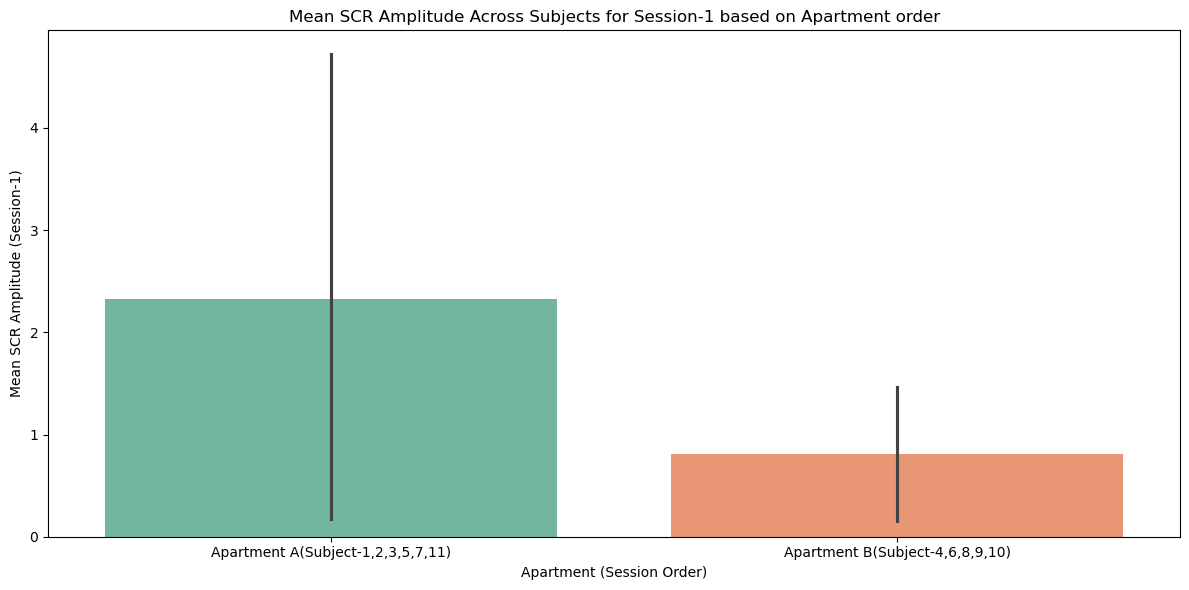

In [125]:
# To plot mean SCR Amplitude for all subjects across test session  based on Apartment order 

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

import os
import pandas as pd
import matplotlib.pyplot as plt

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

# Initialize dictionary to store session-1 mean SCR Amplitude for each subject
session_1_means = {}

# Define apartment categories based on subject folders
apartment_categories = {
    'sub-1': 'Apartment A(Subject-1,2,3,5,7,11)',
    'sub-2': 'Apartment A(Subject-1,2,3,5,7,11)',
    'sub-3': 'Apartment A(Subject-1,2,3,5,7,11)',
    'sub-4': 'Apartment B(Subject-4,6,8,9,10)',
    'sub-5': 'Apartment A(Subject-1,2,3,5,7,11)',
    'sub-6': 'Apartment B(Subject-4,6,8,9,10)',
    'sub-7': 'Apartment A(Subject-1,2,3,5,7,11)',
    'sub-8': 'Apartment B(Subject-4,6,8,9,10)',
    'sub-9': 'Apartment B(Subject-4,6,8,9,10)',
    'sub-10': 'Apartment B(Subject-4,6,8,9,10)',
    'sub-11': 'Apartment A(Subject-1,2,3,5,7,11)',
}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[4])  # Access only session-1.csv
        if os.path.exists(session_1_path):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['EDA_Tonic'].mean()
                session_1_means[sub_dir] = (mean_SCR_Amp, apartment_categories[sub_dir])
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")

# Separate data into columns for mean and category
subjects = [key for key in session_1_means.keys()]
mean_values, categories = zip(*session_1_means.values())

# Create a DataFrame with categories as an additional column
df_data = pd.DataFrame({'Subject': subjects, 'Mean_SCR_Amp': mean_values, 'Category': categories})

# Create the bar graph with category on the x-axis
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Mean_SCR_Amp', data=df_data, palette='Set2')

# Set labels and title
plt.xlabel('Apartment (Session Order)')
plt.ylabel('Mean SCR Amplitude (Session-1)')
plt.title('Mean SCR Amplitude Across Subjects for Session-1 based on Apartment order')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Session_1_Categories.png", dpi=300, bbox_inches='tight')
else:
    plt.show()



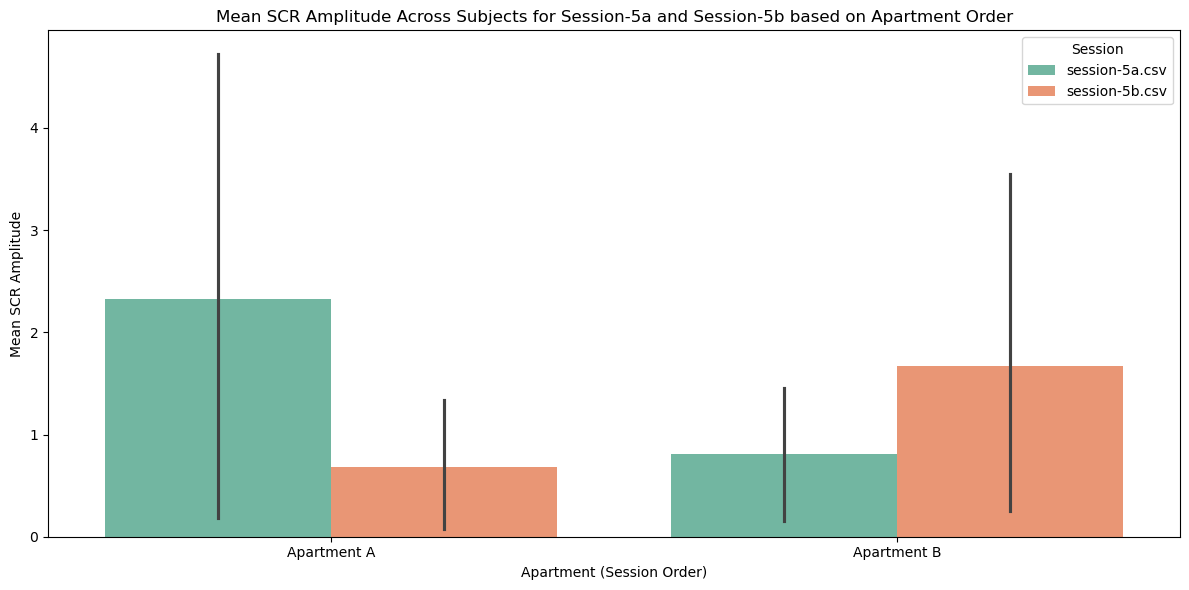

In [135]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

sessions = ['session-5a.csv', 'session-5b.csv']  # Specify the sessions you want to compare
folder_names = [f'sub-{i}' for i in range(1, 12)]  # Adjusted to cover sub-1 to sub-11

# Define apartment categories based on subject folders
apartment_categories = {
    'session-5a.csv': {
        'sub-1': 'Apartment A',
        'sub-2': 'Apartment A',
        'sub-3': 'Apartment A',
        'sub-4': 'Apartment B',
        'sub-5': 'Apartment A',
        'sub-6': 'Apartment B',
        'sub-7': 'Apartment A',
        'sub-8': 'Apartment B',
        'sub-9': 'Apartment B',
        'sub-10': 'Apartment B',
        'sub-11': 'Apartment A',
    },
    'session-5b.csv': {
        'sub-1': 'Apartment B',
        'sub-2': 'Apartment B',
        'sub-3': 'Apartment B',
        'sub-4': 'Apartment A',
        'sub-5': 'Apartment B',
        'sub-6': 'Apartment A',
        'sub-7': 'Apartment B',
        'sub-8': 'Apartment A',
        'sub-9': 'Apartment A',
        'sub-10': 'Apartment A',
        'sub-11': 'Apartment B',
    }
}

# Initialize dictionary to store mean SCR Amplitude for each session and subject
session_means = {session: {} for session in sessions}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        for session in sessions:
            session_path = os.path.join(sub_path, session)
            if os.path.exists(session_path):
                try:
                    df_session = pd.read_csv(session_path)
                    mean_SCR_Amp = df_session['EDA_Tonic'].mean()
                    session_means[session][sub_dir] = mean_SCR_Amp
                except Exception as e:  # Handle potential errors
                    print(f"Error processing file {session_path}: {e}")

# Create a DataFrame for plotting
data_to_plot = []
for session in sessions:
    for subject, mean_value in session_means[session].items():
        data_to_plot.append({
            'Subject': subject,
            'Mean_SCR_Amp': mean_value,
            'Session': session,
            'Category': apartment_categories[session][subject]
        })

df_data = pd.DataFrame(data_to_plot)

# Create the grouped bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=df_data, x='Category', y='Mean_SCR_Amp', hue='Session', palette='Set2')

# Set labels and title
plt.xlabel('Apartment (Session Order)')
plt.ylabel('Mean SCR Amplitude')
plt.title('Mean SCR Amplitude Across Subjects for Session-5a and Session-5b based on Apartment Order')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Sessions_Categories.png", dpi=300, bbox_inches='tight')
else:
    plt.show()


In [145]:
print(df_data)
print(pivot_data)

   Subject  Mean_SCR_Amp         Session     Category
0    sub-1      6.220317  session-5a.csv  Apartment A
1    sub-2      0.179815  session-5a.csv  Apartment A
2    sub-3      4.819583  session-5a.csv  Apartment A
3    sub-4      0.020687  session-5a.csv  Apartment B
4    sub-6      1.805801  session-5a.csv  Apartment B
5    sub-7      0.292898  session-5a.csv  Apartment A
6    sub-8      0.620007  session-5a.csv  Apartment B
7    sub-9      0.066958  session-5a.csv  Apartment B
8   sub-10      1.538200  session-5a.csv  Apartment B
9   sub-11      0.110109  session-5a.csv  Apartment A
10   sub-1      4.979441  session-5b.csv  Apartment B
11   sub-2      0.227826  session-5b.csv  Apartment B
12   sub-3      2.553866  session-5b.csv  Apartment B
13   sub-4      0.015595  session-5b.csv  Apartment A
14   sub-6      1.778114  session-5b.csv  Apartment A
15   sub-7      0.487993  session-5b.csv  Apartment B
16   sub-8      0.253213  session-5b.csv  Apartment A
17   sub-9      0.053902  se

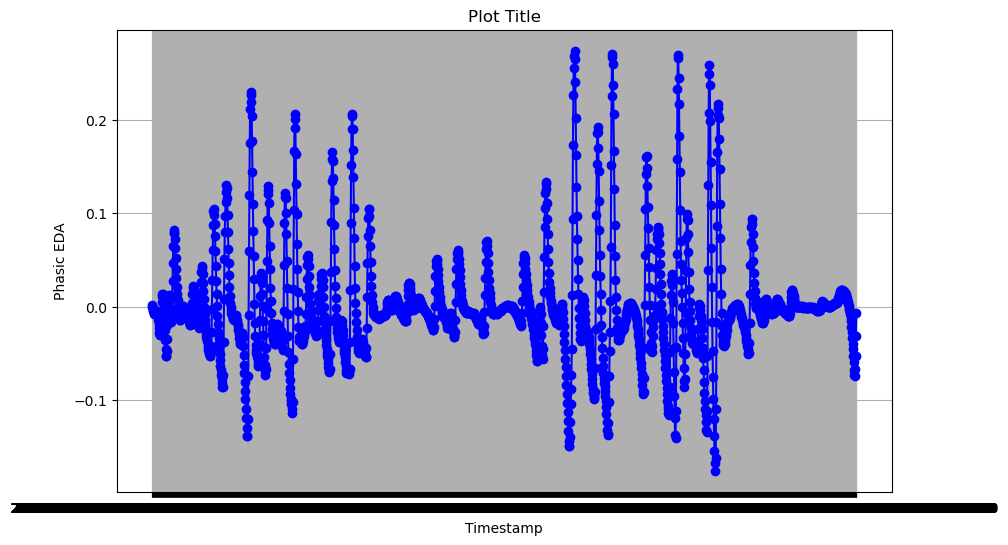

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-1/session-4.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming the x-axis and y-axis data are in columns named 'x_column' and 'y_column'
x_data = df['timestamp']
y_data = df['EDA_Phasic']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Phasic EDA')
plt.title('Plot Title')

# Show the plot
plt.grid(True)
plt.show()

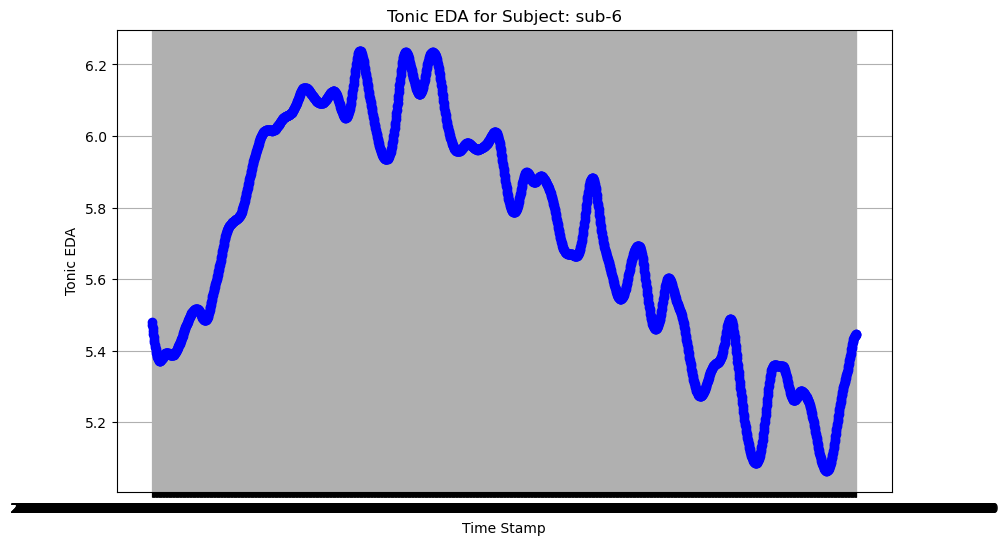

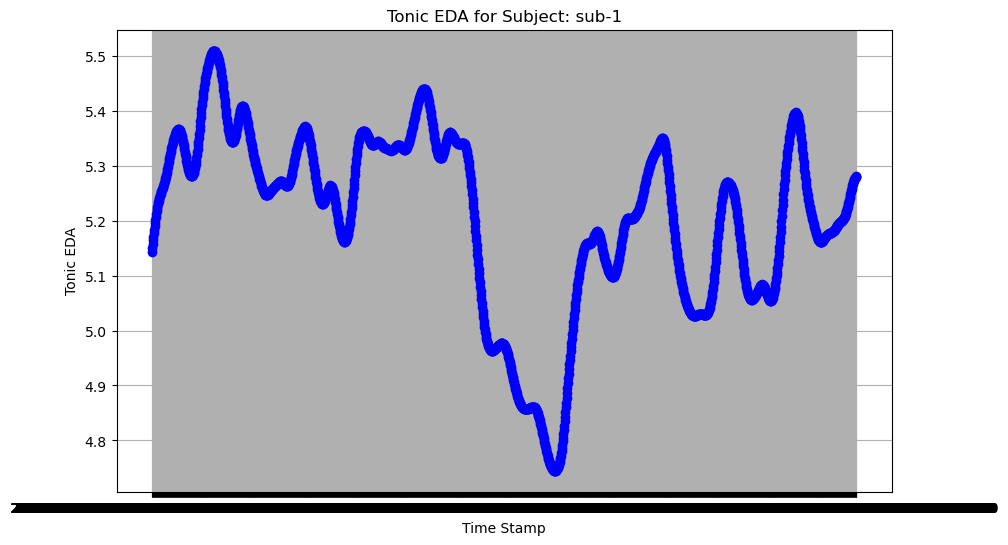

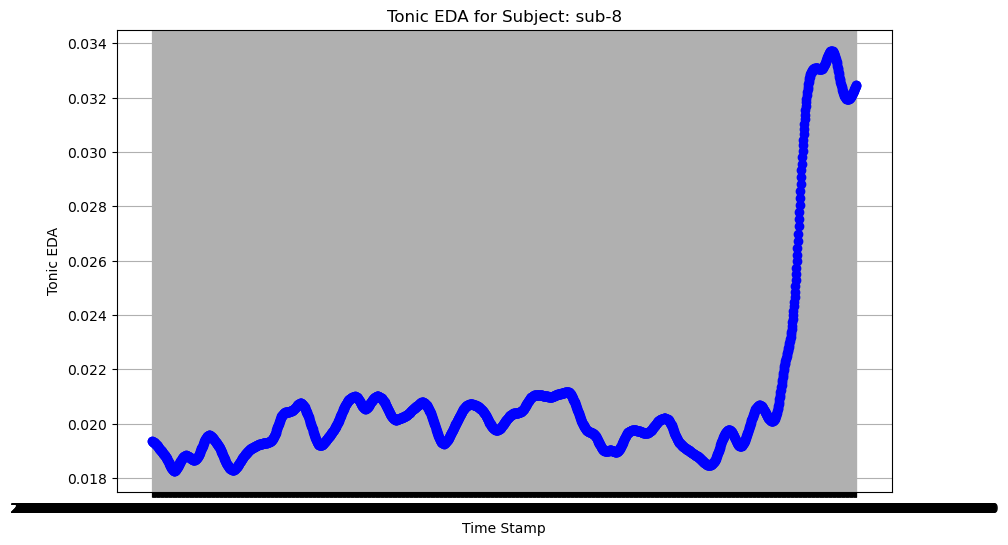

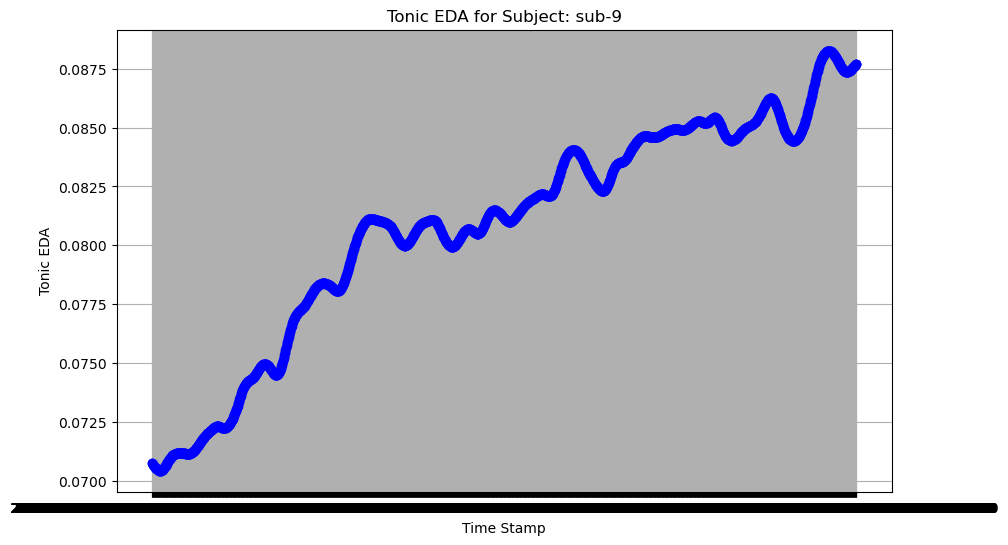

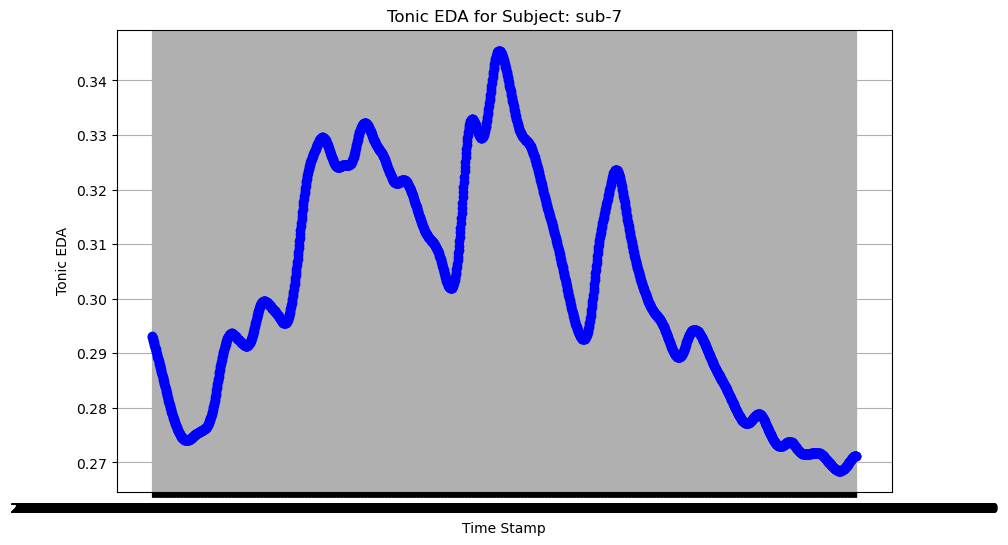

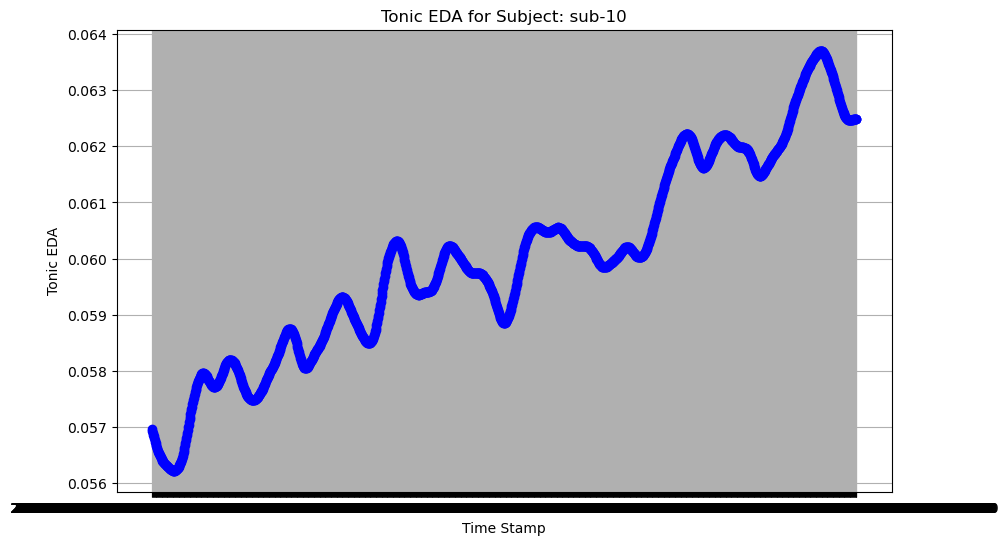

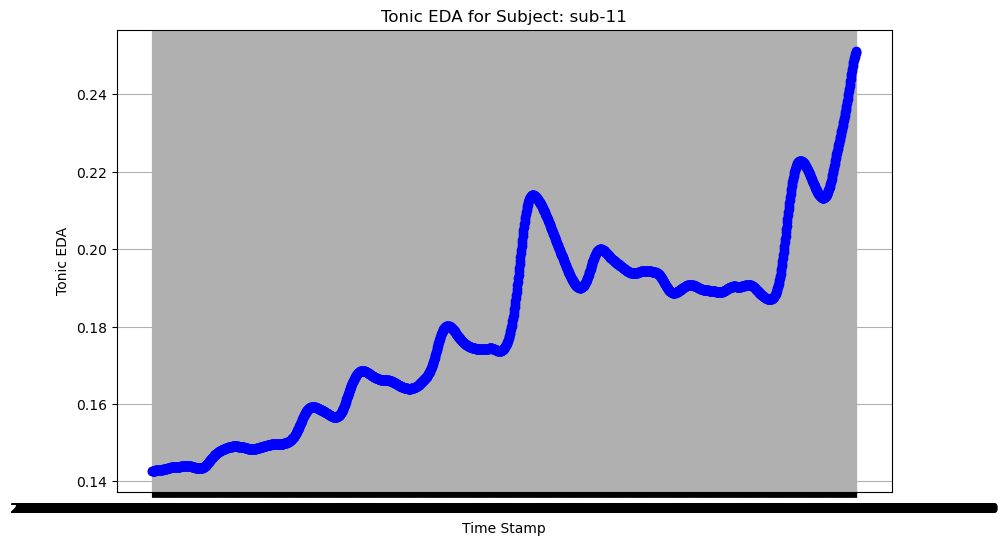

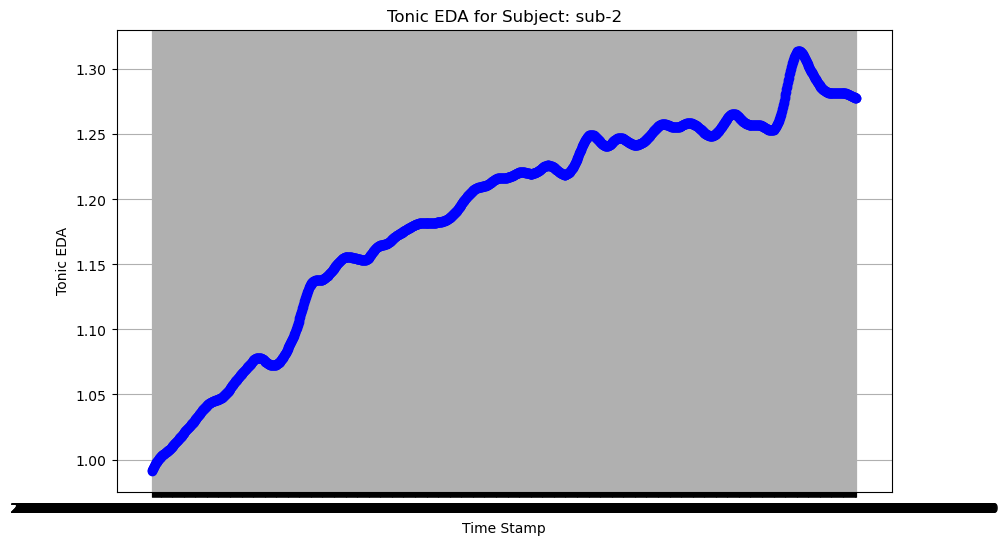

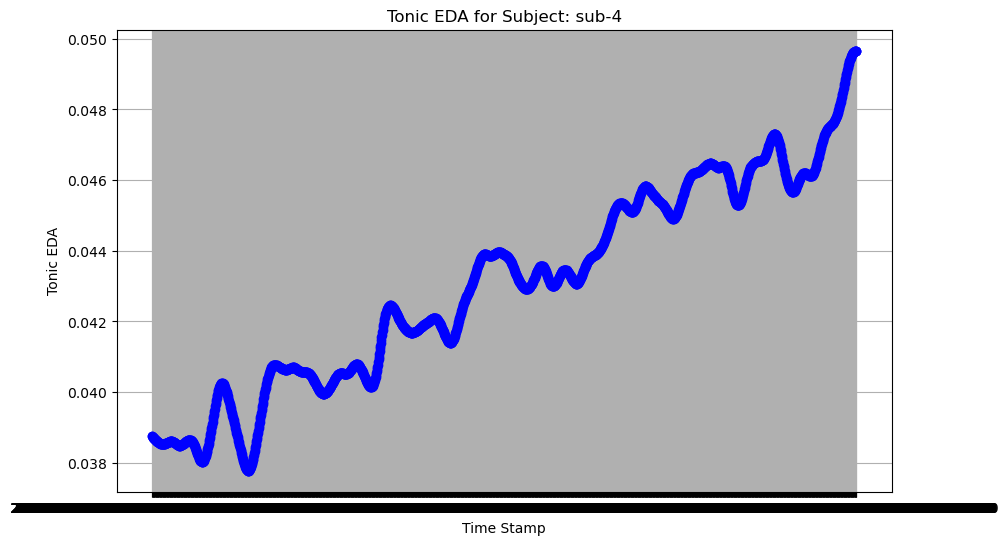

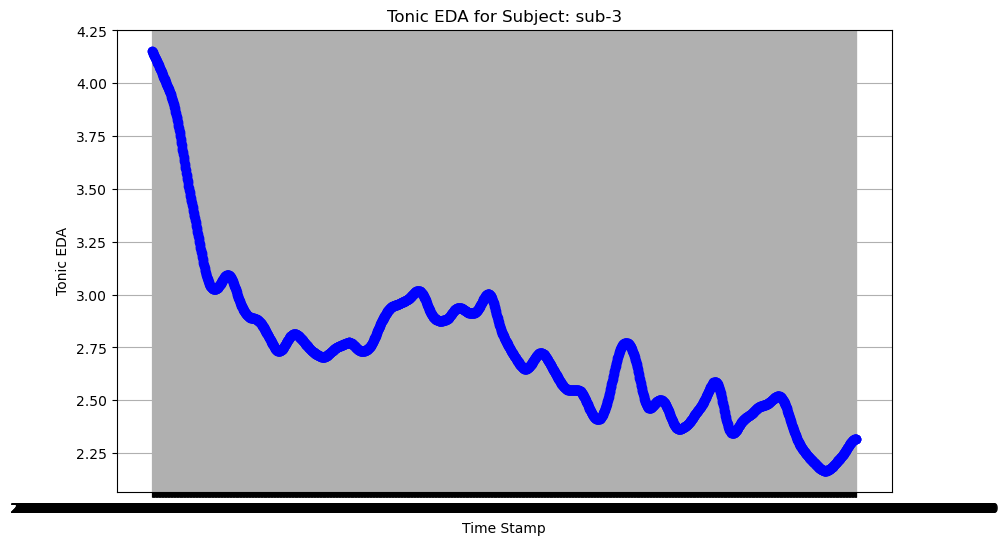

Finished processing all subjects (session-1.csv).


In [207]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Loop through subfolders
for sub_folder in os.listdir(base_dir):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-1.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                df = pd.read_csv(session_path)

                # Assuming x-axis and y-axis data are in 'timestamp' and 'EDA_Tonic'
                x_data = df['timestamp']
                y_data = df['EDA_Tonic']

                # Create the plot (adjust figure size as needed)
                plt.figure(figsize=(10, 6))
                plt.plot(x_data, y_data, marker='o', linestyle='-', color='blue')

                # Set labels and title (modify title if needed)
                plt.xlabel('Time Stamp')
                plt.ylabel('Tonic EDA')
                plt.title(f'Tonic EDA for Subject: {sub_folder}')

                # Show the plot (optional)
                plt.grid(True)
                plt.show()

                # Optionally, save the plot with subject name
                # plt.savefig(f'{sub_folder}_Tonic_EDA.png', dpi=300, bbox_inches='tight')

                # Close the plot for next iteration
                plt.close()
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

print("Finished processing all subjects (session-1.csv).")

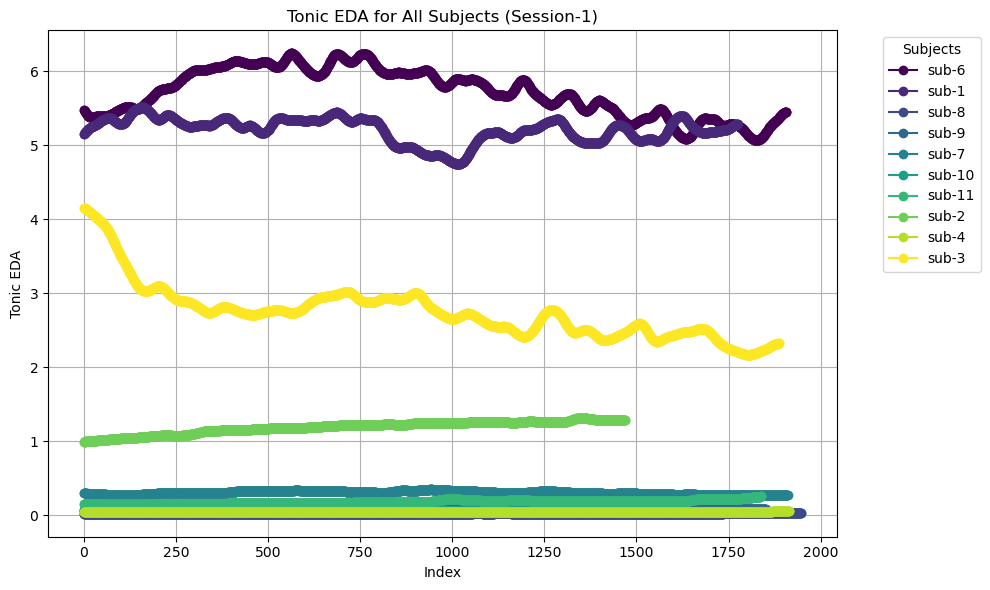

In [206]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Create a list to store data for plotting
data = []

# Loop through subfolders and read data
for sub_folder in os.listdir(base_dir):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-1.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file and store data in the list
                df = pd.read_csv(session_path)
                data.append((df['EDA_Tonic'], sub_folder))  # Store only the EDA_Tonic values
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

# Create a color map for different subjects
colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

# Initialize a plot
plt.figure(figsize=(10, 6))

# Plot all subjects' data using index
for idx, (y_data, sub_folder) in enumerate(data):
    plt.plot(y_data.index, y_data, marker='o', linestyle='-', color=colors[idx], label=sub_folder)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Tonic EDA')
plt.title('Tonic EDA for All Subjects (Session-1)')
plt.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


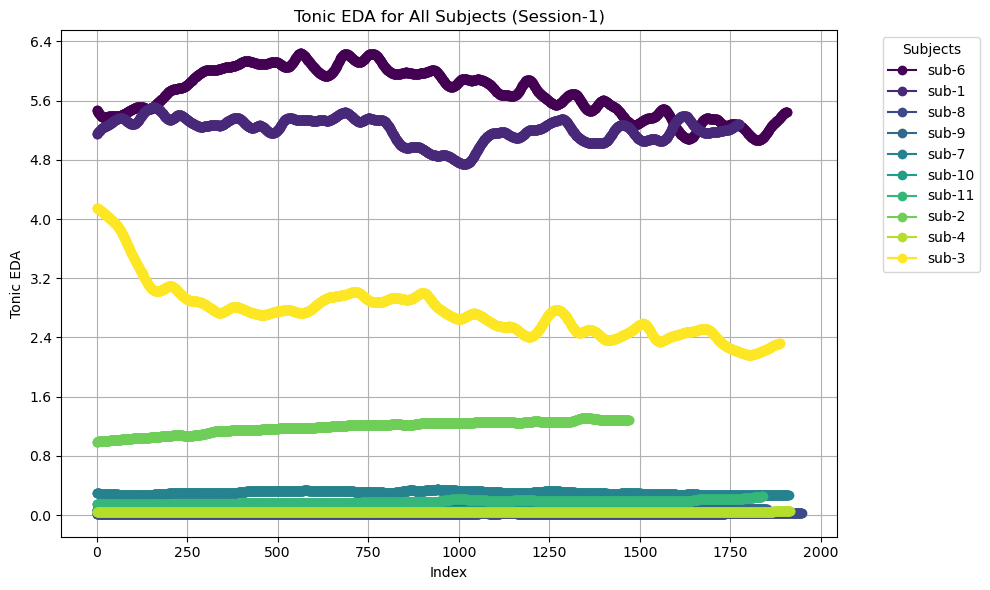

In [208]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Create a list to store data for plotting
data = []

# Loop through subfolders and read data
for sub_folder in os.listdir(base_dir):
    sub_path = os.path.join(base_dir, sub_folder)

    # Check if it's a directory
    if os.path.isdir(sub_path):
        session_file = 'session-1.csv'  # Target session file
        session_path = os.path.join(sub_path, session_file)

        # Check if session-1.csv exists
        if os.path.exists(session_path):
            try:
                # Read the CSV file
                df = pd.read_csv(session_path)

                # Ensure 'EDA_Tonic' column exists
                if 'EDA_Tonic' in df.columns:
                    # Handle NaN values if they exist
                    eda_tonic = df['EDA_Tonic'].dropna()  # Dropping NaN values

                    # Store only the EDA_Tonic values with their subject name
                    data.append((eda_tonic, sub_folder))
                else:
                    print(f"Missing 'EDA_Tonic' column in {session_path}")
            except pd.errors.EmptyDataError:
                print(f"Empty CSV file: {session_path}")
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_path}: {e}")

# Check if data is available for plotting
if data:
    # Create a color map for different subjects
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

    # Initialize a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot all subjects' data using index
    for idx, (y_data, sub_folder) in enumerate(data):
        ax.plot(y_data.index, y_data, marker='o', linestyle='-', color=colors[idx], label=sub_folder)

    # Set labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Tonic EDA')
    ax.set_title('Tonic EDA for All Subjects (Session-1)')
    
    # Set the number of ticks for x-axis and y-axis using MaxNLocator
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # Limits the number of x-ticks to integers
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # Increase y-axis tick units (10 bins)

    # You can manually adjust x-axis and y-axis ticks if needed (optional)
    # plt.xticks(np.arange(0, max(x_data.index), step=50))  # Example of fixed x-ticks every 50 units
    # plt.yticks(np.arange(min(y_data), max(y_data), step=5))  # Example of fixed y-ticks every 5 units

    # Legend outside the plot
    ax.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')  
    
    # Grid and layout adjustments
    ax.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for plotting.")


Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-2/session-5a.csv: 'sub-2'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-4/session-5a.csv: 'sub-4'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-7/session-5a.csv: 'sub-7'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-8/session-5a.csv: 'sub-8'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-9/session-5a.csv: 'sub-9'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-10/session-5a.csv: 'sub-10'
Error processing file /Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs/sub-11/session-5a.csv: 'sub-11'


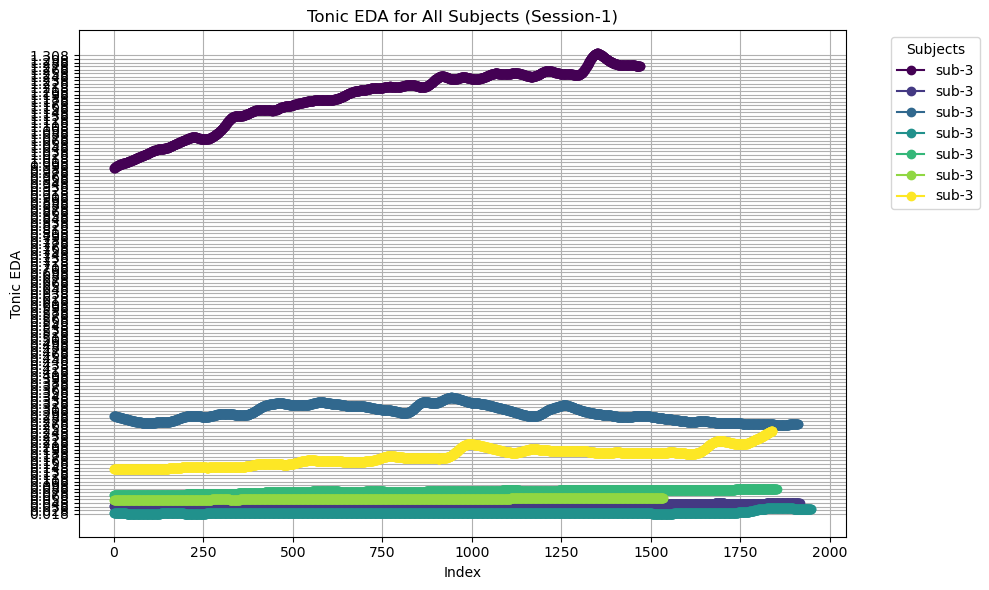

In [217]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Base directory for subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
folder_names = ['sub-2', 'sub-4', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']

# Create a list to store data for plotting
data = []



# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[4])  # Access only session-1.csv
        if os.path.exists(session_1_path):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['EDA_Tonic'].mean()
                session_1_means[sub_dir] = (mean_SCR_Amp, apartment_categories[sub_dir])
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")



# Loop through subfolders and read data
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)

    # Check if it's a directory
    if os.path.isdir(sub_path):
         session_1_path = os.path.join(sub_path, sessions[0])  # Access only session-1.csv
         if os.path.exists(session_1_path):
            try:
                # Read the CSV file
                df = pd.read_csv(session_1_path)

                # Ensure 'EDA_Tonic' column exists
                if 'EDA_Tonic' in df.columns:
                    # Handle NaN values if they exist
                    eda_tonic = df['EDA_Tonic'].dropna()  # Dropping NaN values

                    # Store only the EDA_Tonic values with their subject name
                    data.append((eda_tonic, sub_dir))
                else:
                    print(f"Missing 'EDA_Tonic' column in {session_1_path}")
            except pd.errors.EmptyDataError:
                print(f"Empty CSV file: {session_1_path}")
            except Exception as e:  # Handle potential errors during reading
                print(f"Error processing file {session_1_path}: {e}")

# Check if data is available for plotting
if data:
    # Create a color map for different subjects
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))

    # Initialize a plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Track min and max y_data to adjust y-axis ticks later
    all_y_data_min = np.inf
    all_y_data_max = -np.inf

    # Plot all subjects' data using index
    for idx, (y_data, sub_dir) in enumerate(data):
        ax.plot(y_data.index, y_data, marker='o', linestyle='-', color=colors[idx], label=sub_folder)

        # Update the global min and max y_data values
        all_y_data_min = min(all_y_data_min, y_data.min())
        all_y_data_max = max(all_y_data_max, y_data.max())

    # Set labels and title
    ax.set_xlabel('Index')
    ax.set_ylabel('Tonic EDA')
    ax.set_title('Tonic EDA for All Subjects (Session-1)')

    # Manually adjust y-ticks
    plt.yticks(np.arange(all_y_data_min, all_y_data_max, step=0.01))  # Set y-ticks every 5 units

    # Legend outside the plot
    ax.legend(title='Subjects', bbox_to_anchor=(1.05, 1), loc='upper left')  
    
    # Grid and layout adjustments
    ax.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("No data available for plotting.")


             0         1         2         3         4         5         6  \
0     0.064429  1.147168  0.010460  1.589989  0.136572  0.053139  0.076288   
1     0.064397  1.145929  0.010505  1.588964  0.136454  0.053124  0.076271   
2     0.064366  1.144700  0.010551  1.587914  0.136334  0.053110  0.076255   
3     0.064338  1.143486  0.010598  1.586839  0.136211  0.053096  0.076240   
4     0.064313  1.142293  0.010645  1.585742  0.136087  0.053083  0.076228   
...        ...       ...       ...       ...       ...       ...       ...   
1350  0.077662  1.481323  0.020166  0.693446  0.126452  0.060864  0.124361   
1351  0.077666  1.479539  0.020135  0.692821  0.126442  0.060880  0.124368   
1352  0.077669  1.477784  0.020102  0.692208  0.126432  0.060896  0.124371   
1353  0.077671  1.476057  0.020069  0.691607  0.126422  0.060910  0.124368   
1354  0.077672  1.474357  0.020034  0.691018  0.126413  0.060922  0.124362   

             7         8         9  Row_Wise_Mean  
0     0.008

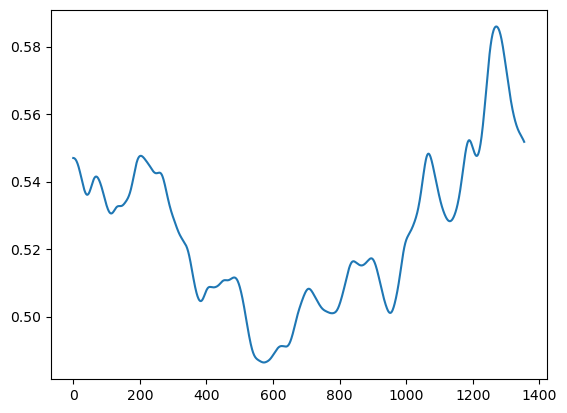

In [197]:
import pandas as pd
import os

# Initialize an empty DataFrame
rows_tonic_eda = pd.DataFrame()

# Define the main folder containing subject folders
main_folder = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Iterate through each subject folder
for subject in os.listdir(main_folder):
    subject_path = os.path.join(main_folder, subject)
    
    # Check if it is a directory
    if os.path.isdir(subject_path):
        # Define the path for the session-1 file
        session_file_path = os.path.join(subject_path, 'session-2.csv')
        
        # Check if the session-1 file exists
        if os.path.isfile(session_file_path):
            # Read the session-1 CSV file
            session_data = pd.read_csv(session_file_path)
            
            # Append the 'EDA_Tonic' column to the DataFrame
            rows_tonic_eda = pd.concat([rows_tonic_eda, session_data[['EDA_Tonic']]], ignore_index=True, axis=1)
            # Remove NaN values from the DataFrame
            rows_tonic_eda= rows_tonic_eda.dropna()



row_wise_mean = rows_tonic_eda.mean(axis=1)

# Display the row-wise mean
#print(row_wise_mean)  

rows_tonic_eda['Row_Wise_Mean'] = row_wise_mean

# Display the updated DataFrame
print(rows_tonic_eda)

import matplotlib.pyplot as plt
plt.plot(row_wise_mean)


Standard Deviation of EDA_Tonic values:
0       2.308800
1       2.307923
2       2.307063
3       2.306225
4       2.305414
          ...   
1466    2.138108
1467    2.136693
1468    2.135260
1469    2.133812
1470    2.132351
Length: 1471, dtype: float64


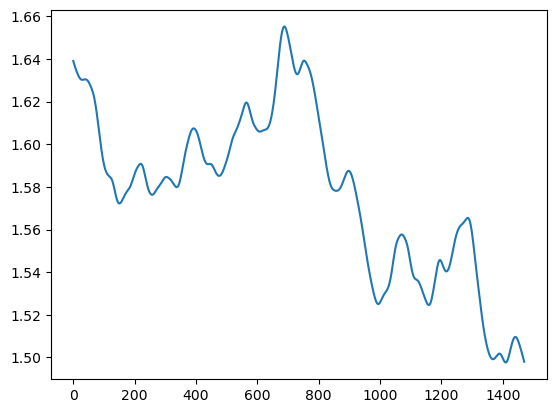

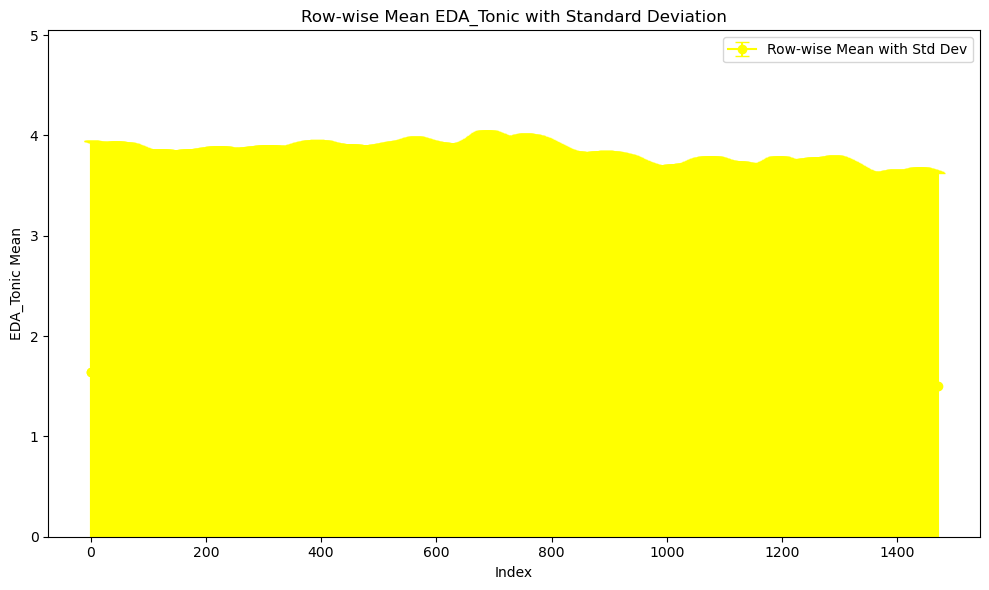

In [188]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Initialize an empty DataFrame
rows_tonic_eda = pd.DataFrame()

# Define the main folder containing subject folders
main_folder = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'

# Iterate through each subject folder
for subject in os.listdir(main_folder):
    subject_path = os.path.join(main_folder, subject)
    
    # Check if it is a directory
    if os.path.isdir(subject_path):
        # Define the path for the session-1 file
        session_file_path = os.path.join(subject_path, 'session-1.csv')
        
        # Check if the session-1 file exists
        if os.path.isfile(session_file_path):
            # Read the session-1 CSV file
            session_data = pd.read_csv(session_file_path)
            
            # Append the 'EDA_Tonic' column to the DataFrame
            rows_tonic_eda = pd.concat([rows_tonic_eda, session_data[['EDA_Tonic']]], ignore_index=True, axis=1)
            # Remove NaN values from the DataFrame
            rows_tonic_eda = rows_tonic_eda.dropna()


# Calculate the row-wise mean and standard deviation
row_wise_mean = rows_tonic_eda.mean(axis=1)
row_wise_std = rows_tonic_eda.std(axis=1)

plt.plot(row_wise_mean)


print("Standard Deviation of EDA_Tonic values:")
print(row_wise_std)

# Prepare error values for plotting (using standard deviation here)
error = row_wise_std

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
#plt.plot(row_wise_mean, marker='o', color='b', label='Row-wise Mean')
plt.errorbar(x=np.arange(len(row_wise_mean)), y=row_wise_mean, yerr=error, fmt='-o', capsize=5, label='Row-wise Mean with Std Dev', color='yellow')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('EDA_Tonic Mean')
plt.title('Row-wise Mean EDA_Tonic with Standard Deviation')
plt.legend()

# Set y-axis limits (adjust these values as needed)
plt.ylim([0, max(row_wise_mean + error) + 1])  # Adjust the upper limit based on your data

plt.tight_layout()
plt.show()


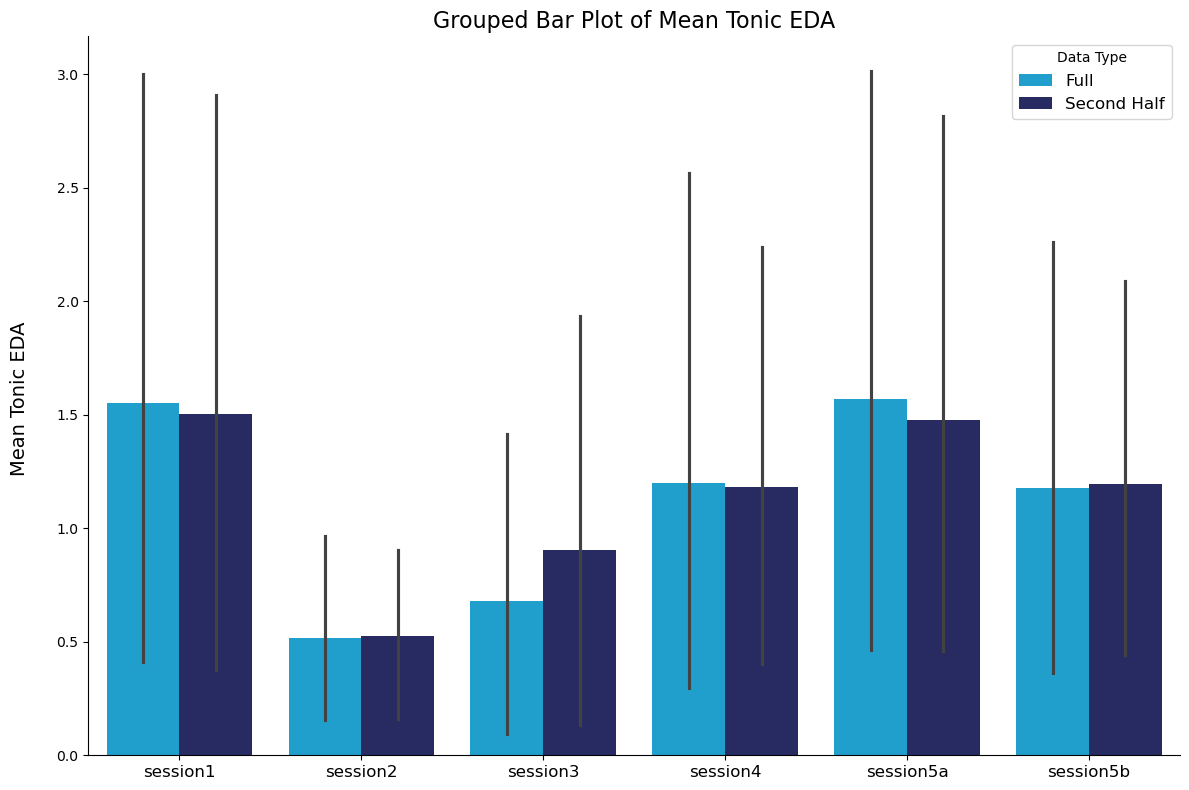

In [202]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means_full = []
session_means_second_half = []

for session_file, session_name in zip(sessions, session_names):
    # Loop through subjects
    for sub_dir in os.listdir(base_dir):
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)

            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)

                # Calculate mean for the full data
                mean_full = df_session['EDA_Tonic'].mean()
                session_means_full.append([sub_dir, session_name, mean_full])

                # Calculate mean for the second half
                half_way_point = int(len(df_session) / 2)
                df_session_second_half = df_session.iloc[half_way_point:]
                mean_tonic_eda = df_session_second_half['EDA_Tonic'].mean()
                session_means_second_half.append([sub_dir, session_name, mean_tonic_eda])

# Create DataFrames for full and second half means
df_full_means = pd.DataFrame(session_means_full, columns=['subject', 'session', 'mean_tonic_eda'])
df_second_half_means = pd.DataFrame(session_means_second_half, columns=['subject', 'session', 'mean_tonic_eda'])

# Add a new column to distinguish between full and second half means
df_full_means['data_type'] = 'Full'
df_second_half_means['data_type'] = 'Second Half'

# Concatenate the DataFrames
df_all_sessions = pd.concat([df_full_means, df_second_half_means], ignore_index=True)

# Now you can proceed with your plotting code

# Order subjects for plotting
subject_order = [f'sub-{i}' for i in range(1, 11)]
df_all_sessions['subject'] = pd.Categorical(df_all_sessions['subject'], categories=subject_order, ordered=True)

# Fill NaN values (if any)
df_all_sessions['mean_tonic_eda'].fillna(df_all_sessions['mean_tonic_eda'].mean(), inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(data=df_all_sessions, x='session', y='mean_tonic_eda', hue='data_type', palette=["#05ace8", "#1e226c"])
plt.xlabel(None)
plt.ylabel('Mean Tonic EDA \n', fontsize=14)
plt.title('Grouped Bar Plot of Mean Tonic EDA', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Data Type', fontsize=12)
plt.tight_layout()
sns.despine()

# Save figure if specified
save_figs = 1  # Adjust as necessary
if save_figs == 1:
    plt.savefig(f"{fig_dir}/grouped-participant-session-means.png", dpi=300)

plt.show()


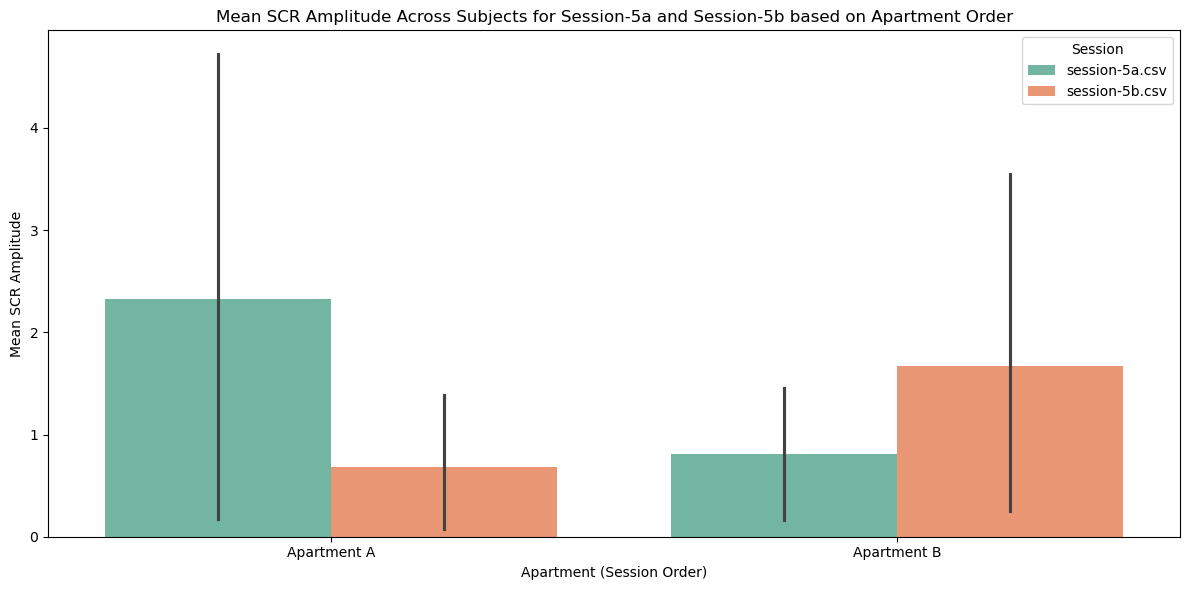

In [146]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# Change to 1 to save figures to fig_dir
save_figs = 0

sessions = ['session-5a.csv', 'session-5b.csv']  # Specify the sessions you want to compare
folder_names = [f'sub-{i}' for i in range(1, 12)]  # Adjusted to cover sub-1 to sub-11

# Define apartment categories based on subject folders
apartment_categories = {
    'session-5a.csv': {
        'sub-1': 'Apartment A',
        'sub-2': 'Apartment A',
        'sub-3': 'Apartment A',
        'sub-4': 'Apartment B',
        'sub-5': 'Apartment A',
        'sub-6': 'Apartment B',
        'sub-7': 'Apartment A',
        'sub-8': 'Apartment B',
        'sub-9': 'Apartment B',
        'sub-10': 'Apartment B',
        'sub-11': 'Apartment A',
    },
    'session-5b.csv': {
        'sub-1': 'Apartment B',
        'sub-2': 'Apartment B',
        'sub-3': 'Apartment B',
        'sub-4': 'Apartment A',
        'sub-5': 'Apartment B',
        'sub-6': 'Apartment A',
        'sub-7': 'Apartment B',
        'sub-8': 'Apartment A',
        'sub-9': 'Apartment A',
        'sub-10': 'Apartment A',
        'sub-11': 'Apartment B',
    }
}

# Initialize dictionary to store mean SCR Amplitude for each session and subject
session_means = {session: {} for session in sessions}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        for session in sessions:
            session_path = os.path.join(sub_path, session)
            if os.path.exists(session_path):
                try:
                    df_session = pd.read_csv(session_path)
                    mean_SCR_Amp = df_session['EDA_Tonic'].mean()
                    session_means[session][sub_dir] = mean_SCR_Amp
                except Exception as e:  # Handle potential errors
                    print(f"Error processing file {session_path}: {e}")

# Create a DataFrame for plotting
data_to_plot = []
for session in sessions:
    for subject, mean_value in session_means[session].items():
        data_to_plot.append({
            'Subject': subject,
            'Mean_SCR_Amp': mean_value,
            'Session': session,
            'Category': apartment_categories[session][subject]
        })

df_data = pd.DataFrame(data_to_plot)

# Create the grouped bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=df_data, x='Category', y='Mean_SCR_Amp', hue='Session', palette='Set2')

# Set labels and title
plt.xlabel('Apartment (Session Order)')
plt.ylabel('Mean SCR Amplitude')
plt.title('Mean SCR Amplitude Across Subjects for Session-5a and Session-5b based on Apartment Order')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Sessions_Categories.png", dpi=300, bbox_inches='tight')
else:
    plt.show()
